# Back-testing Simulator

### Load Libraries

In [1]:
import pandas as pd
import numpy as np
from utils.util import get_data, plot_data, get_bollinger_bands
import matplotlib.pyplot as plt
%matplotlib inline

### Initialization

In [2]:
date_start = '2012-06-20'
date_end = '2012-09-12'
stock = 'IBM'
file_name = 'out\\backtest.csv'

dates = pd.date_range(date_start, date_end)

### Load Data

In [3]:
orders = pd.read_csv(file_name, index_col=0, parse_dates=True)
orders

,Symbol,Order,Shares
Date,,,
2012-07-12,IBM,BUY,5
2012-07-19,IBM,SELL,5
2012-07-24,IBM,BUY,5
2012-08-03,IBM,SELL,5
2012-08-23,IBM,BUY,5
2012-09-04,IBM,SELL,5


In [4]:
prices_all = get_data([stock], dates)
df = prices_all[[stock]]
df = df.join(orders[['Order', 'Shares']])
df['daily_val'] = 0.0
df.tail(8)

,IBM,Order,Shares,daily_val
2012-08-31,194.85,NaN,NaN,0.0
2012-09-04,194.54,SELL,5.0,0.0
2012-09-05,195.04,NaN,NaN,0.0
2012-09-06,199.10,NaN,NaN,0.0
2012-09-07,199.50,NaN,NaN,0.0
2012-09-10,200.95,NaN,NaN,0.0
2012-09-11,203.27,NaN,NaN,0.0
2012-09-12,203.77,NaN,NaN,0.0


In [5]:
trading = False

for i, row in df.iterrows():

    if row['Order'] == 'BUY':
        trading = True
        n_stocks = row['Shares']
   
    if trading == True:        
        df.loc[i, 'daily_val'] = n_stocks * row[stock]
    
    if row['Order'] == 'SELL':
        trading = False
        
df['daily_diff'] = df['daily_val'].diff()

In [6]:
ix_buy = df[df['Order'] == 'BUY'].index
df.loc[ix_buy, 'daily_diff'] = 0.0

In [7]:
ix_sell = df[df['Order'] == 'SELL'].index
df_temp = df['daily_diff'].shift(-1)
df_temp.loc[ix_sell] = 0.0
df['daily_diff'] = df_temp.shift(+1) 

In [8]:
buy0 = df[df['Order']=='BUY'].index[0]
daily_diff_temp = df['daily_diff'].copy()
daily_diff_temp.ix[buy0] = df.ix[buy0]['daily_val']
daily_diff_temp.iloc[:daily_diff_temp.index.get_loc(buy0)] = np.nan
df['cum_val'] = daily_diff_temp.cumsum()
df

,IBM,Order,Shares,daily_val,daily_diff,cum_val
2012-06-20,197.93,NaN,NaN,0.00,NaN,NaN
2012-06-21,192.57,NaN,NaN,0.00,0.00,NaN
2012-06-22,192.88,NaN,NaN,0.00,0.00,NaN
2012-06-25,192.04,NaN,NaN,0.00,0.00,NaN
2012-06-26,191.13,NaN,NaN,0.00,0.00,NaN
2012-06-27,192.18,NaN,NaN,0.00,0.00,NaN
2012-06-28,190.59,NaN,NaN,0.00,0.00,NaN
2012-06-29,194.75,NaN,NaN,0.00,0.00,NaN
2012-07-02,195.00,NaN,NaN,0.00,0.00,NaN
2012-07-03,195.10,NaN,NaN,0.00,0.00,NaN


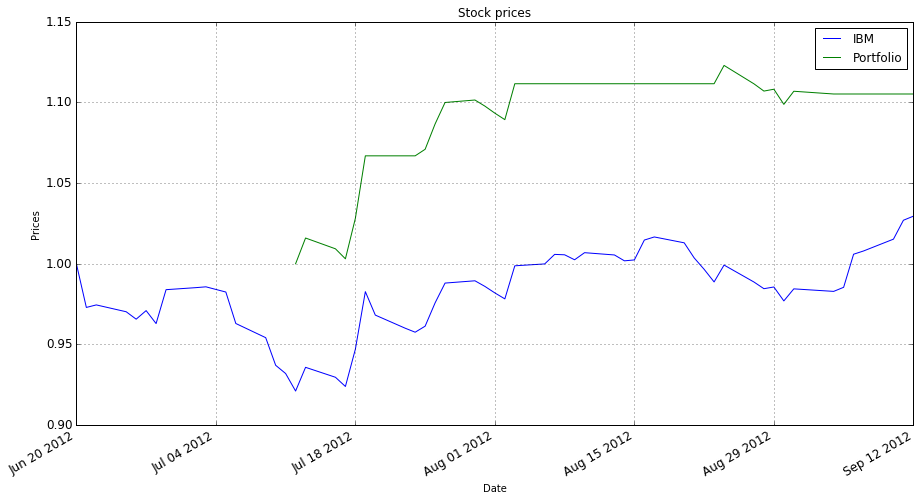

In [9]:
df_temp = pd.concat([df[stock]/df.ix[0][stock], df['cum_val']/df.ix[buy0 ]['cum_val']], keys=[stock, 'Portfolio'], axis=1)
plot_data(df_temp)